# Part 3: Analysis

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from langdetect import detect
from utils1 import Cleaner,Super_list
from glob import glob
from pprint import pprint
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from os import path
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
import multidict as multidict
from wordcloud import WordCloud, STOPWORDS
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder


In [3]:
full=pd.read_csv("full.csv") #reading the concatenated full data

In [28]:
full.head()

,Unnamed: 0,Artist,Name,Year,Popularity,genre,lyrics,N_WORDS,Polarity,Sentiment
0,0,Atif Aslam,Tera Hone Laga Hoon,2018,82.596217,Rock,Shining in the setting sun. Like a pearl upon ...,387,0.33,0.47
1,1,ABBA,Angel Eyes,2001,100.000000,Pop,"Ah-ha-ha, ah-aah. Ah-ha-ha, ah-aah. Ah-ha-ha. ...",364,0.05,0.41
2,2,ABBA,Fernando,1977,94.432921,Pop,"Can you hear the drums, Fernando?. I remember ...",322,0.17,0.41
3,3,ABBA,Mamma Mia,1981,91.296185,Pop,I've been cheated by you since I don't know wh...,336,0.01,0.39
4,4,ABBA,Waterloo,1995,88.265979,Pop,"My, my, at Waterloo Napoleon did surrender. Oh...",196,0.28,0.65


In [4]:
def freq_artist(Artist):
    x=Cleaner(Super_list(full[full.Artist==Artist]["lyrics"].tolist()).to_string())
    return x.freq() 
#subseting by artist, getting lyrics, making a super_list class and a cleaner class
#frequency of words by artist

def freq_genre(genre):
    return Cleaner(Super_list(full[full.genre==genre]["lyrics"].tolist()).to_string()).freq1()
#frequency of words by genre


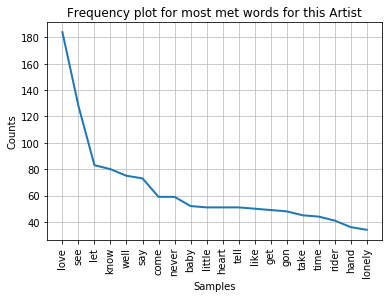

In [29]:
example=freq_artist("Elvis Presley")

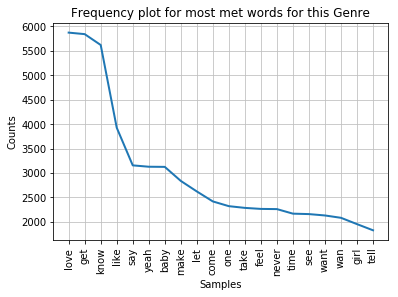

In [6]:
example2=freq_genre("Pop")

In [6]:
def WordC1(Artist):
    # Read the whole text.
    text = Super_list(full[full.Artist==Artist]["lyrics"].tolist()).to_string()

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # The pil way (if you don't have matplotlib)
    image = wordcloud.to_image()
    image.show()

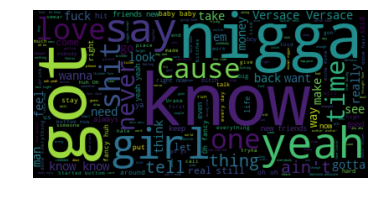

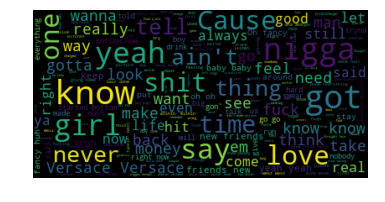

In [7]:
WordC1("Drake")

In [8]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    some = np.array(Image.open("some.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=some)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()    

In [9]:
def genre_wordCloud(genre):
    '''function returning wordcloud based on image'''
    text=Super_list(full[full.genre==genre]["lyrics"].tolist()).to_string()
    makeImage(getFrequencyDictForText(text))

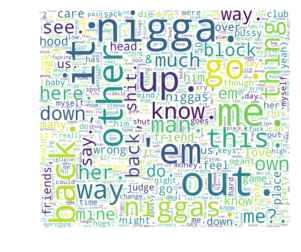

In [10]:
HipHop=genre_wordCloud("HipHop")

In [6]:
def song_adviser():
    '''function returning a song based on user's chosen mood and genre'''
    user_mood=input("Please, choose your preferred mood from the following range:very sad, sad, neutral, happy, very happy  ")
    user_genre=input("Please, choose your preferred genre from the following range: 'Rock', 'Pop', 'Other','Country', 'RB', 'HipHop', 'Jazz', 'Folk','Electronic', 'Indie'  ")
    if user_mood=="very sad":
        df_mood=full[((full['Polarity']<-0.6) & (full['Polarity'] >=-1))]

    elif user_mood=="sad":
        df_mood=full[((full['Polarity']<-0.2) & (full['Polarity'] >=-0.6))] 

    elif user_mood=="neutral":
        df_mood=full[((full['Polarity']<0.2) & (full['Polarity'] >=-0.2))] 

    elif user_mood=="happy":
        df_mood=full[((full['Polarity']<0.6) & (full['Polarity'] >=0.2))]

    elif user_mood=="very happy":
        df_mood=full[((full['Polarity']<=1) & (full['Polarity'] >=0.6))]

    df_mood1=df_mood[(full.genre==user_genre)].sort_values(by='Popularity',ascending=False).loc[:,["Artist", "Name"]]
    df_mood1.reset_index(drop=True)
    df_mood1.index = np.arange(1,len(df_mood1)+1)
    pprint(df_mood1)
    if len(df_mood1)>0:
        return df_mood1
    else:
        print("Sorry we do not have songs matching your preferences, please try again")
        return song_adviser()

In [7]:
def Taguchi():
    '''function returning list of songs and opening the first song's youtube search video'''
    popitka=song_adviser()
    popitka.reset_index(drop=True)
    popitka.index = np.arange(1,len(popitka)+1)
    song_yout=" ".join(popitka.iloc[0,:].tolist())
    browser = webdriver.Chrome()
    url="https://www.youtube.com/"
    browser.get(url)
    browser.implicitly_wait(10)
    browser.find_element_by_id("search").send_keys(song_yout, Keys.ENTER)
    #time.sleep(10)
    new_url=browser.find_element_by_xpath("//a[@class='yt-simple-endpoint style-scope ytd-video-renderer']").get_attribute("href")
    return browser.get(new_url)


In [8]:
Taguchi()

Please, choose your preferred mood from the following range:very sad, sad, neutral, happy, very happy  sad
Please, choose your preferred genre from the following range: 'Rock', 'Pop', 'Other','Country', 'RB', 'HipHop', 'Jazz', 'Folk','Electronic', 'Indie'  Pop


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


               Artist                                Name
1       Justin Bieber                              Sorry 
2     Michael Jackson                                Bad 
3        Taylor Swift                          Bad Blood 
4         Nicki Minaj                       My Chick Bad 
5     Michael Jackson                        Dirty Diana 
6              Grease  There Are Worse Things I Could Do 
7           Zac Efron           Get'cha Head In The Game 
8              Grease         Look At Me, I'm Sandra Dee 
9         Demi Lovato                          Confident 
10      Ariana Grande                    Dangerous Woman 
11      Justin Bieber                Hard 2 Face Reality 
12      One Direction                   The Wake Up Song 
13          Lady GaGa                        Bloody Mary 
14        Demi Lovato     You Don't Do It For Me Anymore 
15    Michael Jackson                             Scream 
16            Rihanna                          Bad Bitch 
17            

In [14]:
cv=CountVectorizer(stop_words="english")
sum_vec=cv.fit_transform(full.lyrics)
le=LabelEncoder() 
y=le.fit_transform(full.genre.astype(str))# for making genres a label
x=sum_vec.toarray()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model=MultinomialNB()## we used MultinomlialNB because we have more than one genre so it will predict genre of the inputed song 

In [15]:
sum_vec.shape

(5781, 30735)

In [16]:
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
model.score(x_train,y_train)

0.7905420991926182

In [18]:
model.score(x_test,y_test)

0.549792531120332

In [19]:
def Django(lyrics):
    '''function determining the genre of the inputted text'''
    lyrics1=[lyrics]
    lyrics1=cv.transform(lyrics1)
    print(le.inverse_transform(model.predict(lyrics1)))
    return le.inverse_transform(model.predict(lyrics1))

In [22]:
Django("""Conversion, software version 7.0
Looking at life through the eyes of a tired hub
Eating seeds as a pastime activity
The toxicity of our city, our city
You, what do you own the world?
How do you own disorder, disorder
Now somewhere between the sacred silence
Sacred silence and sleep
Somewhere, between the sacred silence and sleep
Disorder, disorder, disorder
More wood for the fires, loud neighbors
Flashlight reveries caught in the headlights of a truck
Eating seeds as a pastime activity
The toxicity of our city, of our city
Now, what do you own the world?
How do you own disorder, disorder
Now somewhere between the sacred silence
Sacred silence and sleep
Somewhere between the sacred silence and sleep
Disorder, disorder, disorder
Now,…
Caught in…
""") #e.g. this is SOAD's song

['Rock']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Rock'], dtype=object)

In [25]:
Django("""ow, love is all we need
We are the world
We are the children
We are the ones who make a brighter day, so let's start giving
There's a choice we're making
We're saving our own lives
It's true we'll make a better day, just you and me""")

['Pop']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Pop'], dtype=object)